<a href="https://colab.research.google.com/github/orcuncakaar/orcuncakaar/blob/main/16_ADABoostClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
df = pd.read_csv("diabetes.csv")

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [30]:
df["Insulin"].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

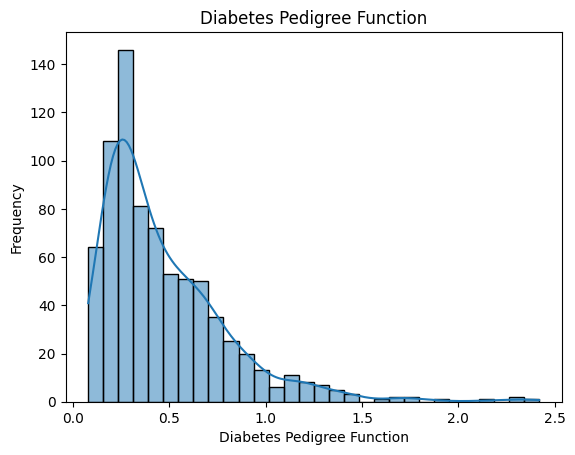

In [33]:
sns.histplot(df["DiabetesPedigreeFunction"], bins = 30, kde = True)
plt.title("Diabetes Pedigree Function")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frequency")
plt.show()

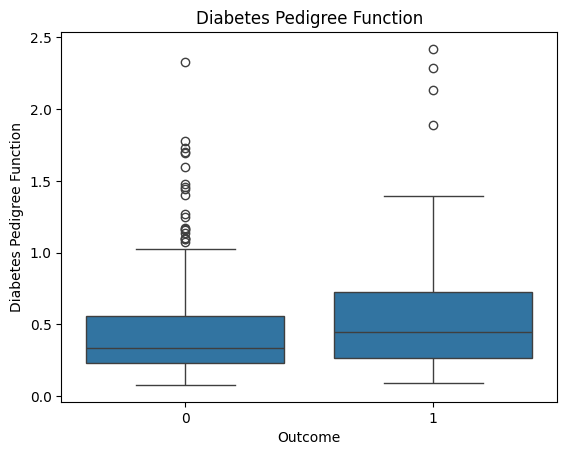

In [34]:
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction",data = df)
plt.title("Diabetes Pedigree Function")
plt.xlabel("Outcome")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

In [35]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [37]:
columns_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

In [38]:
medians = {}

for col in columns_to_fill:
  median_value=(X_train[X_train[col] !=0][col].median())
  medians[col] = median_value
  X_train[col] = X_train[col].replace(0, median_value)
  X_test[col] = X_test[col].replace(0, median_value)

In [39]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
y_pred = ada.predict(X_test_scaled)

In [44]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

[[87 21]
 [17 29]]
0.7532467532467533


In [45]:
#hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
adaboost_param = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1.0]
}

In [48]:
grid = GridSearchCV(estimator = ada, param_grid = adaboost_param, cv = 5,verbose = 1)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=1)

In [49]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

In [50]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=200)

In [51]:
ada.fit(X_train_scaled, y_train)
y_pred = ada.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       108
           1       0.57      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154

[[86 22]
 [17 29]]
0.7467532467532467


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [53]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [54]:
results = {}


In [57]:
for name, clf in classifiers.items():
    print(f"--- {name} Modeli ---")

    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }


    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc != 'N/A':
        print(f"ROC AUC: {roc_auc:.4f}")

--- Logistic Regression Modeli ---
Accuracy: 0.7532
Precision: 0.5870
Recall: 0.5870
F1-Score: 0.5870
ROC AUC: 0.8013
--- K-Nearest Neighbors Modeli ---
Accuracy: 0.6948
Precision: 0.4906
Recall: 0.5652
F1-Score: 0.5253
ROC AUC: 0.7440
--- Support Vector Machine Modeli ---
Accuracy: 0.7273
Precision: 0.5435
Recall: 0.5435
F1-Score: 0.5435
ROC AUC: 0.7832
--- Decision Tree Modeli ---
Accuracy: 0.6948
Precision: 0.4912
Recall: 0.6087
F1-Score: 0.5437
ROC AUC: 0.6701
--- Random Forest Modeli ---
Accuracy: 0.7273
Precision: 0.5417
Recall: 0.5652
F1-Score: 0.5532
ROC AUC: 0.7720
--- Gradient Boosting Modeli ---
Accuracy: 0.7338
Precision: 0.5455
Recall: 0.6522
F1-Score: 0.5941
ROC AUC: 0.7949


In [61]:
results_df = pd.DataFrame(results).T
results_df.replace('N/A', np.nan, inplace=True)

results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
results_df_sorted.plot(kind='bar', figsize=(14, 8), rot=45)
plt.title('Sınıflandırma Algoritmalarının Performans Karşılaştırması')
plt.ylabel('Skor')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('classifier_comparison.png')
plt.close()

print("\nKarşılaştırma sonuçları DataFrame'i:")
print(results_df)
results_df.to_csv('classifier_comparison_results.csv')



Karşılaştırma sonuçları DataFrame'i:
                        Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression     0.753247   0.586957  0.586957  0.586957  0.801329
K-Nearest Neighbors     0.694805   0.490566  0.565217  0.525253  0.743961
Support Vector Machine  0.727273   0.543478  0.543478  0.543478  0.783213
Decision Tree           0.694805   0.491228  0.608696  0.543689  0.670089
Random Forest           0.727273   0.541667  0.565217  0.553191  0.772041
Gradient Boosting       0.733766   0.545455  0.652174  0.594059  0.794887
